#**COVID 19 Analysis Project**

- Given the data about covid 19 patients write code to visualize the impact and analyze the trend of the rate of infection and recovery as well as make predictions.
- The predictions will be made about the number of cases expected in a week in future based on the current trends.

**GUIDELINES:**

- Use plotly (visualization library) to create interactive visualizations.
- Use Facebook prophet library to make time series models.

### Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Loading the Dataset

In [9]:
df = pd.read_csv('/content/covid_19_clean_complete.csv')

### Basic Data Exploration

In [10]:
# View the First Few Rows
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [11]:
# Shape of the DataFrame
df.shape

(49068, 10)

In [12]:
# Data Types and Non-Null Counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [13]:
# Renaming Columns for Consistency
df.rename(columns= {'Province/State' : 'State' , 'Country/Region': 'Country'}, inplace=True)

In [14]:
# Identifying Missing Values
df.isna().sum()

,0
State,34404
Country,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


Since the "State" column contains a significant amount of missing data (34,404 out of 49,068 entries), it is dropped to simplify the dataset for further analysis.

In [15]:
# drop State column
df.drop(columns = ['State'], inplace=True)

### Get the country vise total confirmed, active, recovered and death cases.

In [21]:
country_sum = df.groupby('Country')[['Confirmed', 'Deaths',	'Recovered',	'Active']].sum().reset_index()
country_sum

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


### Plotting the Top 10 Countries for Confirmed, Deaths, Recovered, and Active Cases

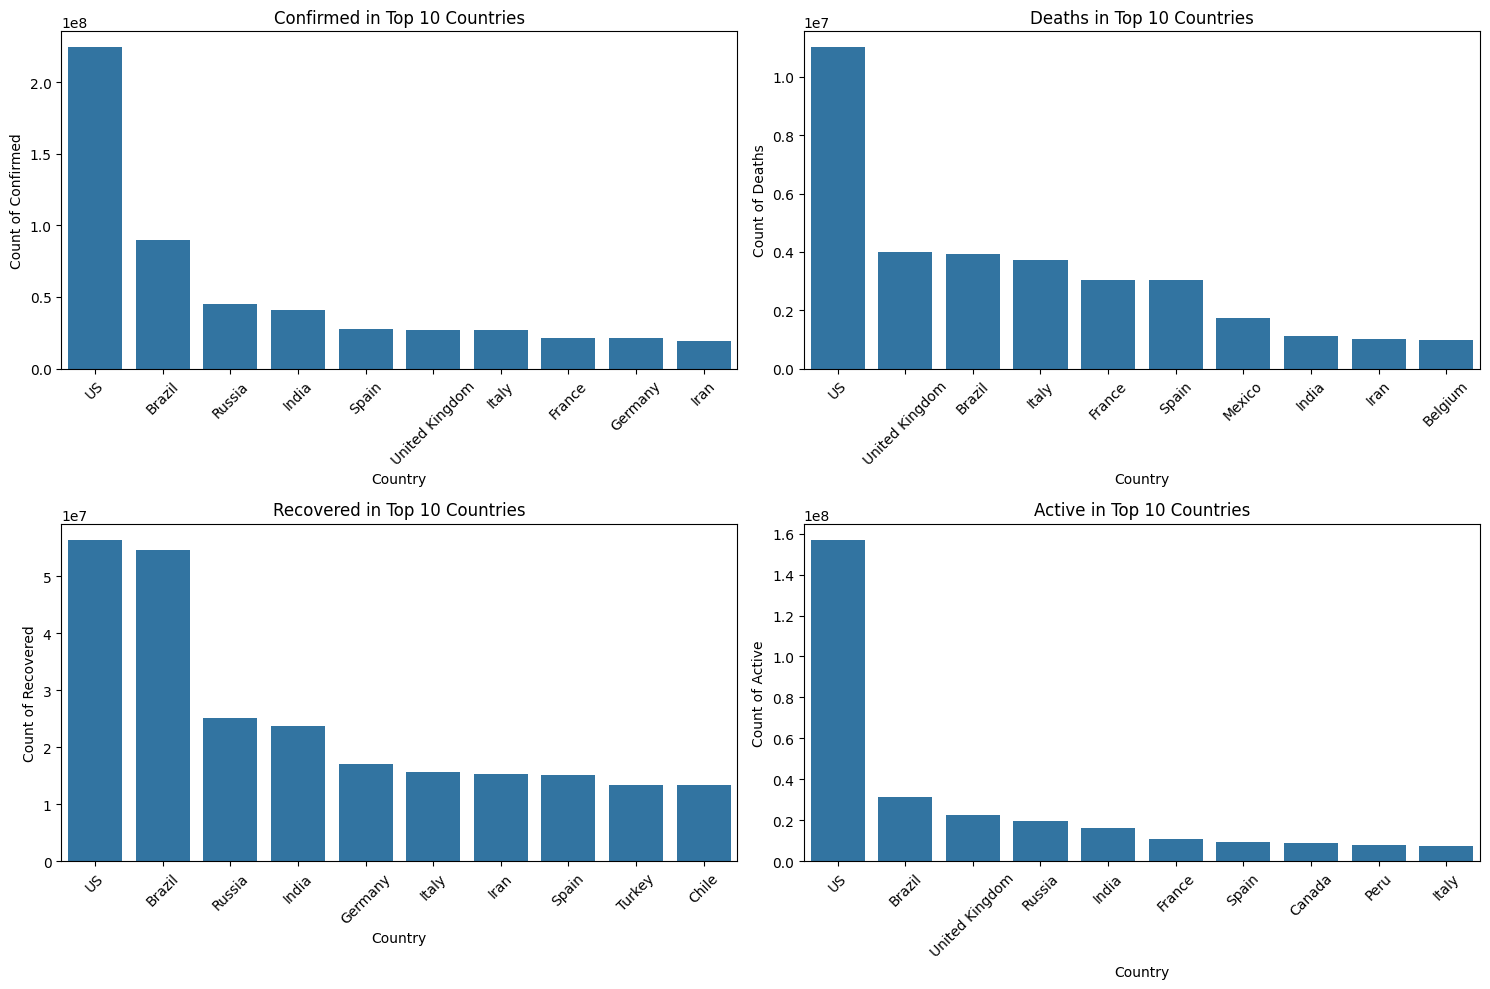

In [33]:
top10_cols = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Set up the grid
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid for 4 plots
axes = axes.flatten()  # Flatten axes to easily iterate

# Loop through each column and axis
for i, col in enumerate(top10_cols):
    top10 = country_sum.nlargest(10, col)
    sns.barplot(x=top10['Country'], y=top10[col], ax=axes[i])
    axes[i].set_xlabel('Country')
    axes[i].set_ylabel(f'Count of {col}')
    axes[i].set_title(f'{col} in Top 10 Countries')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##Summary of the Top 10 Countries by COVID-19 Cases

The bar plots visualize the top 10 countries for each category: confirmed cases, deaths, recovered cases, and active cases.

#### 1. Confirmed Cases:

The United States has the highest number of confirmed cases, followed by Brazil, Russia, India, and Spain. These countries represent the highest burden of confirmed COVID-19 cases globally.

#### 2. Deaths:

The most deaths from COVID-19 are also in the United States, with Brazil and the United Kingdom next. This shows how serious the situation is in these places.

#### 3. Recovered Cases:

The United States has the highest number of recovered cases, showcasing a strong recovery rate. Brazil, Russia, and India also have many recoveries, indicating that people are getting better.

#### 4. Active Cases:

The United States has a lot of active cases right now, meaning many people are still sick. Brazil and India also have many active cases, showing that they need to keep working on health measures.

### Using Plotly to Visualize COVID-19 Cases by Country on a World Map: Confirmed, Deaths, Recovered, Active

In [64]:
for col in top10_cols:
    fig = px.choropleth(country_sum,
                        locations='Country',
                        locationmode='country names',
                        hover_name='Country',
                        color=col,
                        title=f'{col} Cases by Country',
                        color_continuous_scale='Viridis')
    fig.show()

### Time Series using fbprophet:

- FaceBook Prophet
- it is open source tool for forecasting the time series data

**For Deaths**

1 col : date

2 : deaths data

In [47]:
death_cases = df.groupby('Date')['Deaths'].sum().reset_index()
death_cases

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [48]:
death_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    188 non-null    object
 1   Deaths  188 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [49]:
# renaming columns as mandatory for passing into fbprophet
death_cases.columns = ['ds', 'y']  #ds represents date column, y represents data
# changed ds column to date time format
death_cases['ds'] = pd.to_datetime(death_cases['ds'])
death_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


### Model Building

In [53]:
from prophet import Prophet
#created an object of model
model = Prophet(interval_width = 0.95)
model.fit(death_cases)  #fitting the model

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2vsvvq0d/b7drmxpf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2vsvvq0d/4yurkre6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85480', 'data', 'file=/tmp/tmp2vsvvq0d/b7drmxpf.json', 'init=/tmp/tmp2vsvvq0d/4yurkre6.json', 'output', 'file=/tmp/tmp2vsvvq0d/prophet_model65b3fmle/prophet_model-20241005145857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:58:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:58:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Create future dates

In [57]:
# Create a DataFrame with future dates for forecasting
future_dates = model.make_future_dataframe(periods = 14, freq = 'D')
future_dates

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
197,2020-08-06
198,2020-08-07
199,2020-08-08
200,2020-08-09


### Making the future Forecast

In [58]:
forecast = model.predict(future_dates)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-522.113015,-3659.947468,1966.414177,-522.113015,-522.113015,-191.187036,-191.187036,-191.187036,-191.187036,-191.187036,-191.187036,0.0,0.0,0.0,-713.300051
1,2020-01-23,-432.419147,-3149.759758,3065.108216,-432.419147,-432.419147,388.672090,388.672090,388.672090,388.672090,388.672090,388.672090,0.0,0.0,0.0,-43.747057
2,2020-01-24,-342.725280,-2415.463711,3387.484129,-342.725280,-342.725280,874.263328,874.263328,874.263328,874.263328,874.263328,874.263328,0.0,0.0,0.0,531.538048
3,2020-01-25,-253.031412,-2310.619226,3454.813355,-253.031412,-253.031412,726.888550,726.888550,726.888550,726.888550,726.888550,726.888550,0.0,0.0,0.0,473.857138
4,2020-01-26,-163.337545,-3191.950026,2726.189379,-163.337545,-163.337545,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,0.0,0.0,0.0,-328.938355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2020-08-06,698308.575523,689734.088020,707698.993336,689475.592247,707008.672278,388.672090,388.672090,388.672090,388.672090,388.672090,388.672090,0.0,0.0,0.0,698697.247613
198,2020-08-07,703337.982946,693694.111905,714592.755040,693335.286699,713196.743638,874.263328,874.263328,874.263328,874.263328,874.263328,874.263328,0.0,0.0,0.0,704212.246274
199,2020-08-08,708367.390369,697593.163162,721472.221811,697355.117610,719589.730837,726.888550,726.888550,726.888550,726.888550,726.888550,726.888550,0.0,0.0,0.0,709094.278919
200,2020-08-09,713396.797793,699985.034185,726751.001076,700944.846275,726319.861041,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,0.0,0.0,0.0,713231.196982


In [59]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          202 non-null    datetime64[ns]
 1   trend                       202 non-null    float64       
 2   yhat_lower                  202 non-null    float64       
 3   yhat_upper                  202 non-null    float64       
 4   trend_lower                 202 non-null    float64       
 5   trend_upper                 202 non-null    float64       
 6   additive_terms              202 non-null    float64       
 7   additive_terms_lower        202 non-null    float64       
 8   additive_terms_upper        202 non-null    float64       
 9   weekly                      202 non-null    float64       
 10  weekly_lower                202 non-null    float64       
 11  weekly_upper                202 non-null    float64       

In [60]:
# Convert forecasted values to integers
forecast[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']].astype(int)

In [61]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-713,-3659,1966
1,2020-01-23,-43,-3149,3065
2,2020-01-24,531,-2415,3387
3,2020-01-25,473,-2310,3454
4,2020-01-26,-328,-3191,2726
...,...,...,...,...
197,2020-08-06,698697,689734,707698
198,2020-08-07,704212,693694,714592
199,2020-08-08,709094,697593,721472
200,2020-08-09,713231,699985,726751


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



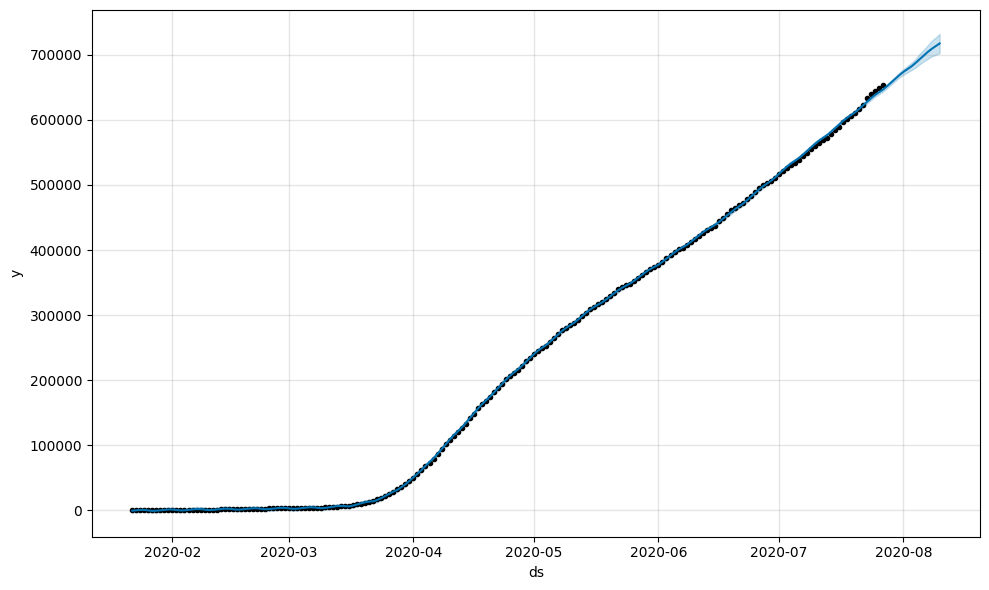

In [63]:
deaths_forecast = model.plot(forecast)

**From the above graph, the black dots represents the actual data of deaths, blue line represents the forecast of deaths, blue small range represents the confidnece interval of forecast.**